In [4]:
# Import dependencies
import requests
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [5]:
# Read files into DataFrame
path_conflict = Path("Resources/conflict_data.csv")
conflict_df = pd.read_csv(path_conflict)
path_migration = Path("Resources/net_migration.csv")
migration_df = pd.read_csv(path_migration)

path_population = Path("Resources/population(1).csv")
population_df = pd.read_csv(path_population)

In [6]:
# Preview Data Sets
conflict_df.head()
conflict_df.tail()

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
6965,Zimbabwe,ZWE,2018,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0
6969,Zimbabwe,ZWE,2022,0,0,0,0


In [7]:
population_df.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,255563,211607,161196,110709,64310,28381,8153,1346,115,8
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,256915,211966,161821,111465,65210,29148,8672,1483,109,9
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,258952,211946,162710,112142,66123,29903,9137,1584,129,10
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,261238,211731,163777,112800,67058,30647,9561,1693,155,11
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,263301,211816,164736,113474,67953,31345,9963,1830,179,11


In [8]:
# Clean up Population Table to just country, year, and pop
selected_columns = population_df[["Country name", "Year", "Population"]]
population_only_df = pd.DataFrame(selected_columns)
population_only_df.head()

,Country name,Year,Population
0,Afghanistan,1950,7480464
1,Afghanistan,1951,7571542
2,Afghanistan,1952,7667534
3,Afghanistan,1953,7764549
4,Afghanistan,1954,7864289


In [9]:
# Check info on all the dfs
conflict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Entity              6970 non-null   object
 1   Code                6970 non-null   object
 2   Year                6970 non-null   int64 
 3   One-sided violence  6970 non-null   int64 
 4   Non-state           6970 non-null   int64 
 5   Intrastate          6970 non-null   int64 
 6   Interstate          6970 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 381.3+ KB


In [10]:
conflict_df.head()

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
0,Abkhazia,OWID_ABK,1989,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0


In [11]:
# Create a new column with total deaths.
conflict_df["total_conflict_deaths"] = conflict_df[["One-sided violence", "Non-state", "Intrastate", "Interstate"]].sum(axis=1)
conflict_df

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0,0


In [12]:
# Remove all conflicts except total.
conflict_df.drop(["One-sided violence", "Non-state", "Intrastate", "Interstate"], axis=1, inplace=True)
conflict_df

,Entity,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0
...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0
6966,Zimbabwe,ZWE,2019,0
6967,Zimbabwe,ZWE,2020,0
6968,Zimbabwe,ZWE,2021,0


In [13]:
# Rename 'Entity' column in conflict_df to 'country name'
conflict_df.rename(columns={'Entity': 'Country name'}, inplace=True)
conflict_df.head()

,Country name,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0


In [14]:
# Merge conflict_df and migration_df on 'country_name' and 'year'
merged_df = pd.merge(conflict_df, migration_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration
0,Abkhazia,OWID_ABK,1989,0.0,NaN
1,Abkhazia,OWID_ABK,1990,0.0,NaN
2,Abkhazia,OWID_ABK,1991,0.0,NaN
3,Abkhazia,OWID_ABK,1992,0.0,NaN
4,Abkhazia,OWID_ABK,1993,0.0,NaN


In [15]:
# Merge the resulting DataFrame with population_df on 'country_name' and 'year'
merged_df = pd.merge(merged_df, population_only_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
0,Abkhazia,OWID_ABK,1989,0.0,NaN,NaN
1,Abkhazia,OWID_ABK,1990,0.0,NaN,NaN
2,Abkhazia,OWID_ABK,1991,0.0,NaN,NaN
3,Abkhazia,OWID_ABK,1992,0.0,NaN,NaN
4,Abkhazia,OWID_ABK,1993,0.0,NaN,NaN


In [16]:
# Remove any NaNs from the dataset.
merged_df.dropna(how="any", inplace=True)
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
34,Afghanistan,AFG,1989,5411.0,2683.0,10673172.0
35,Afghanistan,AFG,1990,1514.0,-666001.0,10694804.0
36,Afghanistan,AFG,1991,3553.0,39926.0,10745168.0
37,Afghanistan,AFG,1992,4366.0,1834556.0,12057436.0
38,Afghanistan,AFG,1993,4097.0,1171818.0,14003764.0


In [17]:
# Remove Code column
merged_df.drop(["Code"], axis=1, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
34,Afghanistan,1989,5411.0,2683.0,10673172.0
35,Afghanistan,1990,1514.0,-666001.0,10694804.0
36,Afghanistan,1991,3553.0,39926.0,10745168.0
37,Afghanistan,1992,4366.0,1834556.0,12057436.0
38,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [18]:
# Reset Index
merged_df.reset_index(drop=True, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Afghanistan,1989,5411.0,2683.0,10673172.0
1,Afghanistan,1990,1514.0,-666001.0,10694804.0
2,Afghanistan,1991,3553.0,39926.0,10745168.0
3,Afghanistan,1992,4366.0,1834556.0,12057436.0
4,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [19]:
# Remove all countries except for one
country_name = "Colombia"
one_country_df = merged_df[merged_df['Country name'] == country_name]
one_country_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
1188,Colombia,1989,380.0,-27370.0,31923126.0
1189,Colombia,1990,692.0,-17237.0,32601396.0
1190,Colombia,1991,834.0,-48488.0,33272632.0
1191,Colombia,1992,1479.0,-29969.0,33939044.0
1192,Colombia,1993,267.0,-30020.0,34614732.0


In [20]:
# Reset Index
one_country_df.reset_index(drop=True, inplace=True)
one_country_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Colombia,1989,380.0,-27370.0,31923126.0
1,Colombia,1990,692.0,-17237.0,32601396.0
2,Colombia,1991,834.0,-48488.0,33272632.0
3,Colombia,1992,1479.0,-29969.0,33939044.0
4,Colombia,1993,267.0,-30020.0,34614732.0


In [21]:
one_country_df

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Colombia,1989,380.0,-27370.000,31923126.0
1,Colombia,1990,692.0,-17237.000,32601396.0
2,Colombia,1991,834.0,-48488.000,33272632.0
3,Colombia,1992,1479.0,-29969.000,33939044.0
4,Colombia,1993,267.0,-30020.000,34614732.0
5,Colombia,1994,1155.0,-16033.001,35295460.0
6,Colombia,1995,922.0,-33016.000,35970104.0
7,Colombia,1996,1379.0,-28154.000,36632576.0
8,Colombia,1997,801.0,-23520.000,37291948.0
9,Colombia,1998,1595.0,-25134.000,37944416.0


In [22]:
# Drop Country Name and rename df
one_country_df.drop(["Country name"], axis=1, inplace=True)

C:\Users\brian\AppData\Local\Temp\ipykernel_120376\797976634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_country_df.drop(["Country name"], axis=1, inplace=True)


In [23]:
Colombia_df = one_country_df
Colombia_df

,Year,total_conflict_deaths,Net migration,Population
0,1989,380.0,-27370.000,31923126.0
1,1990,692.0,-17237.000,32601396.0
2,1991,834.0,-48488.000,33272632.0
3,1992,1479.0,-29969.000,33939044.0
4,1993,267.0,-30020.000,34614732.0
5,1994,1155.0,-16033.001,35295460.0
6,1995,922.0,-33016.000,35970104.0
7,1996,1379.0,-28154.000,36632576.0
8,1997,801.0,-23520.000,37291948.0
9,1998,1595.0,-25134.000,37944416.0


In [24]:
def millions(x, pos):
    return f"{x*1e-6:1.0f}M"

In [33]:
def thousand(x, pos):
    return f"{x*1e-3:1.0f}K"

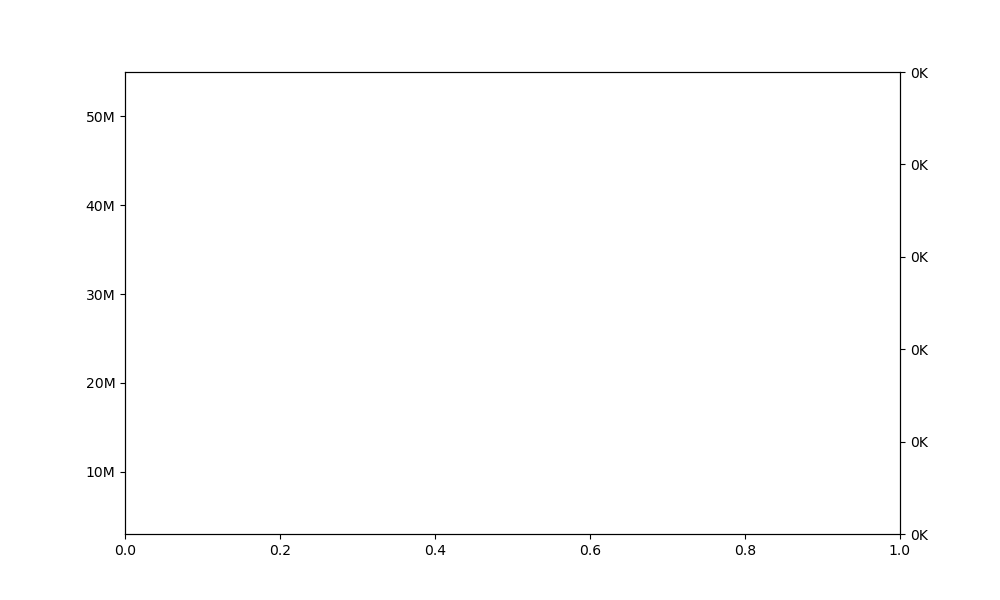

In [34]:
# Create graph for lines to go on
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  
#ax1.set_ylim(-2, 1)
#ax2.set_ylim(-3000, 80000)
ax1.set_ylim(3000000, 55000000)

ax1.yaxis.set_major_formatter(millions)
ax2.yaxis.set_major_formatter(thousand)

In [35]:
# Plot Conclicts
ax2.plot(Colombia_df.Year, Colombia_df.total_conflict_deaths, label="Conflict Deaths", color="red")

In [36]:
# Plot Population
ax1.plot(Colombia_df.Year, Colombia_df.Population, label="Population")

In [37]:
# Plot Migration
ax1.plot(syria_df.Year, syria_df["Net migration"], label="Net migration")

NameError: name 'syria_df' is not defined

In [38]:
# Clean up Graph
ax1.set_xlabel("Year")
ax1.set_ylabel('People')
plt.ylabel('People')
plt.title('Colombia: Conflicts Affect on Pop & Migration')
ax2.grid(True)
#ax1.grid(True)
ax1.legend(loc="upper left")
ax2.legend(loc="best")

In [39]:
Colombia_df.corr()

,Year,total_conflict_deaths,Net migration,Population
Year,1.000000,-0.365833,0.560534,0.998286
total_conflict_deaths,-0.365833,1.000000,-0.260491,-0.335735
Net migration,0.560534,-0.260491,1.000000,0.552951
Population,0.998286,-0.335735,0.552951,1.000000
